<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-some-functions-for-plotting" data-toc-modified-id="Preparing-some-functions-for-plotting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing some functions for plotting</a></span></li><li><span><a href="#Does-time-matter?" data-toc-modified-id="Does-time-matter?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Does time matter?</a></span><ul class="toc-item"><li><span><a href="#Days-to-election" data-toc-modified-id="Days-to-election-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>Days to election</code></a></span><ul class="toc-item"><li><span><a href="#Density" data-toc-modified-id="Density-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Density</a></span></li><li><span><a href="#Influence-on-attrition" data-toc-modified-id="Influence-on-attrition-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Influence on attrition</a></span></li></ul></li><li><span><a href="#Influence-of-time-of-day-on-attrition" data-toc-modified-id="Influence-of-time-of-day-on-attrition-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Influence of <code>time of day</code> on attrition</a></span></li><li><span><a href="#Weekdays-vs-weekends-and-their-effect-on-attrition" data-toc-modified-id="Weekdays-vs-weekends-and-their-effect-on-attrition-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><em>Weekdays vs weekends</em> and their effect on attrition</a></span></li></ul></li><li><span><a href="#Age-and-gender" data-toc-modified-id="Age-and-gender-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Age and gender</a></span><ul class="toc-item"><li><span><a href="#The-effect-of-age-on-attrition" data-toc-modified-id="The-effect-of-age-on-attrition-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The effect of age on attrition</a></span></li><li><span><a href="#Attrition-depending-on-gender-and-age" data-toc-modified-id="Attrition-depending-on-gender-and-age-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Attrition depending on <code>gender</code> and <code>age</code></a></span></li></ul></li><li><span><a href="#Old-but-gold" data-toc-modified-id="Old-but-gold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Old but gold</a></span></li><li><span><a href="#Quality/behavioral-issues" data-toc-modified-id="Quality/behavioral-issues-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quality/behavioral issues</a></span><ul class="toc-item"><li><span><a href="#Correct-left-right-assessment" data-toc-modified-id="Correct-left-right-assessment-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correct left-right assessment</a></span></li><li><span><a href="#Will-they-do-it-again?" data-toc-modified-id="Will-they-do-it-again?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Will they do it again?</a></span></li><li><span><a href="#Is-consistency-in-answers-relevant-for-attrition?" data-toc-modified-id="Is-consistency-in-answers-relevant-for-attrition?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Is consistency in answers relevant for attrition?</a></span></li><li><span><a href="#Plato,-Sokrates-and-a-know-it-all--walk-into-a-cave..." data-toc-modified-id="Plato,-Sokrates-and-a-know-it-all--walk-into-a-cave...-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Plato, Sokrates and a <em>know-it-all</em>  walk into a cave...</a></span></li><li><span><a href="#Correct-left-right-assessment-of-politicians-only" data-toc-modified-id="Correct-left-right-assessment-of-politicians-only-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Correct left-right assessment of politicians only</a></span></li><li><span><a href="#Straightlining" data-toc-modified-id="Straightlining-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span><em>Straightlining</em></a></span></li></ul></li><li><span><a href="#Distribution-of-interview-duration" data-toc-modified-id="Distribution-of-interview-duration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Distribution of interview duration</a></span></li><li><span><a href="#Distribution-of-answers-for-opinion-responses" data-toc-modified-id="Distribution-of-answers-for-opinion-responses-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Distribution of answers for opinion responses</a></span></li><li><span><a href="#The-strongest-correlations" data-toc-modified-id="The-strongest-correlations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The strongest correlations</a></span></li></ul></div>

In [1]:
import sys

sys.path.insert(0, 'utils/')
import csv
import warnings
from collections import Counter
from itertools import repeat

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from dictionaries_rename import (
    get_binary_names,
    get_dummies_names,
    get_ordinal_names,
    opinion_questions,
)

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
waves = ['1', '2', '3', '4', '5']

## Preparing some functions for plotting

In [3]:
def plot_rate_dropped(df, i, title, x_labels, eng_feature):
    dropping = df.groupby([eng_feature, 'panelpat']
                          ).size().unstack(fill_value=0)
    rate_dropped = dropping[0] / dropping.sum(axis=1)
    plt.plot(x_labels, rate_dropped, marker='o', label="wave " + i)
    plt.title(title, fontsize=14)
    plt.xlabel(eng_feature, fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Rate', fontsize=14)
    plt.grid(True)
    plt.legend()

    return rate_dropped

# function for features with values from 0 to 1 where there is no specific x_labels needed


def plot_rate_dropped_normalized(df, i, title, eng_feature):
    dropping = df.groupby([eng_feature, 'panelpat']
                          ).size().unstack(fill_value=0)

    rate_dropped = dropping[0] / dropping.sum(axis=1)
    plt.plot(rate_dropped, marker='o', label=f'wave {i}')
    plt.title(title, fontsize=14)
    plt.xlabel(eng_feature, fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Rate', fontsize=14)
    plt.grid(True)
    plt.legend()
    return fig


def prepare_df_bar(eng_feature, dataset_type):
    df_rate = pd.DataFrame([])
    for wave in waves:
        df = pd.read_csv(f'../../data/data_online_{dataset_type}_w{wave}.csv')
        eng_feature_df = df.filter(like=eng_feature, axis=1)
        panelpat = df.filter(like='panelpat', axis=1)
        eng_feature_df = pd.concat([eng_feature_df, panelpat], axis=1)
        dropping = eng_feature_df.groupby([eng_feature, 'panelpat']
                                          ).size().unstack(fill_value=0)
        rate_dropped = pd.DataFrame(dropping[0]/dropping.sum(axis=1))
        rate_dropped.columns = [f'{wave} wave']
        df_rate = pd.concat([df_rate, rate_dropped], axis=1)
        print(f'wave: {wave}')
        print(Counter(eng_feature_df[eng_feature]))
    return df_rate

## Does time matter?

In this section we want to answer the question whether the point in time at which the survey is completed matters.

### `Days to election`

We first noticed that in various decision tree (DT) models the so called `days_to_election` feature was not only important but even the most important (it made up the "root split").

#### Density

Let us look at the distribution first to get a feel for how this feature looks.

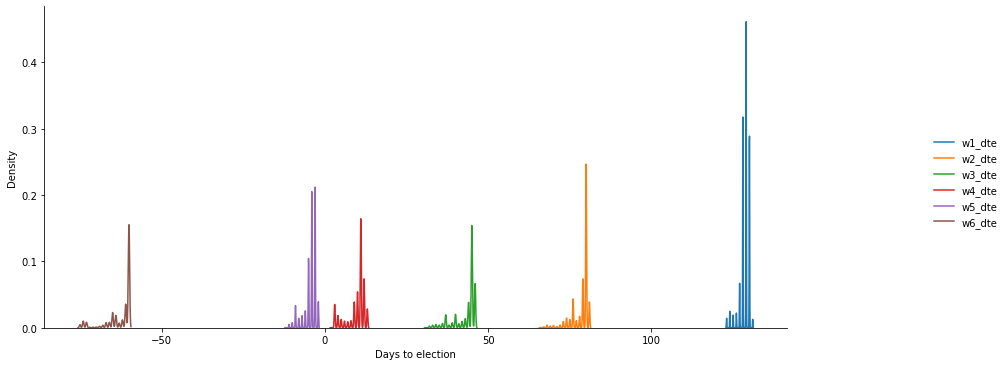

In [4]:
df = pd.read_csv('../../data/10017_da_en_v2_0.tab', sep='\t')
df[['w5_dte', 'w6_dte']] = df[['w5_dte', 'w6_dte']]*(-1)
dtes = df.filter(like='dte', axis=1)
h = sns.displot(dtes, kind="kde", bw_adjust=.25)
h.fig.set_size_inches(15, 5)
h.set_axis_labels("Days to election")

We immediately see the different waves; each spanning approximately a week. We also note that most people seem to respond early in the wave. This means that most people respond right away. The question remains, who are the people that respond late in the wave? Are they contacted later, or are they just deferring?

Also, the first day never seems to be the most popular (with the exception of wave 6). This is surprising as I would assume that most people do the survey right away.. The most of responds were made either on Wednesday or Thursday, so in general day of the week when survey has been sent does not matter

#### Influence on attrition

First we normalize each wave individually, in order to make this feature comparable across waves. We do this by  finding for each wave the earliest day somebody responded and take this as "day zero".

Next we do some binning to get a bit more stability at plot the drop out rate of participant in the next wave depending on which day the answered the previous wave.

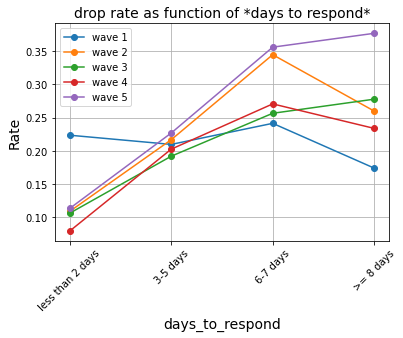

In [5]:
x_labels_dtr = ['less than 2 days', '3-5 days', '6-7 days', '>= 8 days']
df_all_waves_plot = pd.DataFrame([])
for wave in waves:
    df = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    df['days_to_respond'][df['days_to_respond'] <= 2] = 1
    df.loc[(df['days_to_respond'] <= 5) & (
        df['days_to_respond'] > 2), 'days_to_respond'] = 5
    df.loc[(df['days_to_respond'] <= 7) & (
        df['days_to_respond'] > 5), 'days_to_respond'] = 7
    df['days_to_respond'][df['days_to_respond'] > 7] = 8
    data = plot_rate_dropped(df, wave,
                             'drop rate as function of *days to respond*',
                             x_labels_dtr,
                             'days_to_respond')
    df_all_waves_plot = pd.concat([df_all_waves_plot, data], axis=1)
plt.show()

If people respond *sooner*, they are *less likely to drop* (except wave 1). The guess would be that either people who defer "work" do so consistently and are therefore more likely to forget about it in the future - or, people who do not enjoy answering the survey tend to defer and ultimately even drop it. 

### Influence of `time of day` on attrition

Does the time of day a person answers the survey impact their attrition?

wave: 1
Counter({'9-5': 2507, 'evening': 1156, 'morning': 194, 'nighttime': 162})
wave: 2
Counter({'9-5': 1693, 'evening': 1115, 'morning': 177, 'nighttime': 148})
wave: 3
Counter({'9-5': 1582, 'evening': 1104, 'morning': 181, 'nighttime': 127})
wave: 4
Counter({'9-5': 1908, 'evening': 996, 'morning': 169, 'nighttime': 93})
wave: 5
Counter({'9-5': 1822, 'evening': 986, 'morning': 120, 'nighttime': 98})


<Figure size 720x360 with 0 Axes>

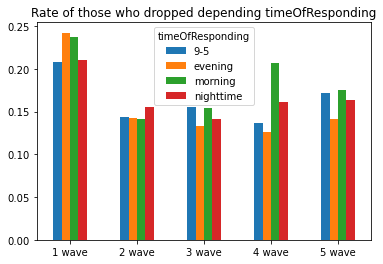

In [7]:
df_rate = pd.DataFrame([])
fig = plt.figure()
fig.set_size_inches(10, 5)
for wave in waves:
    df = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    time_responded = df.filter(like='timeOf', axis=1)
    panelpat = df.filter(like='panelpat', axis=1)
    col_name = 'timeOfResponding'
    time_responded.columns = time_responded.columns.str.split('__', expand=True)
    time_responded = (time_responded.replace(0, np.nan)
                      .stack()
                      .reset_index()
                      .drop([col_name, 'level_0'], 1)
                      .rename(columns={'level_1': col_name})
                      )
    time_responded = pd.concat([time_responded, panelpat], axis=1)
    #plot_rate_dropped_normalized(time_responded, wave,'drop rate', 'timeOfResponding')

    eng_feature_df = time_responded.filter(like='timeOfResponding', axis=1)
    panelpat = time_responded.filter(like='panelpat', axis=1)
    eng_feature_df = pd.concat([eng_feature_df, panelpat], axis=1)
    dropping = eng_feature_df.groupby(['timeOfResponding', 'panelpat']
                                      ).size().unstack(fill_value=0)
    rate_dropped = pd.DataFrame(dropping[0]/dropping.sum(axis=1))
    rate_dropped.columns = [wave + ' wave']
    df_rate = pd.concat([df_rate, rate_dropped], axis=1)

    print('wave: ' + wave)
    print(Counter(time_responded['timeOfResponding']))
plt.show()
ax = df_rate.T.plot.bar(
    title='Rate of those who dropped depending timeOfResponding', rot=0)

Evening seems to be a bit better than the other times but still not much. It would be interesting to know what happened in the morning of wave 4?

### *Weekdays vs weekends* and their effect on attrition

We form to groups of peoples - those who answered the previous wave on a *weekday* and those who did so on the *weekend* - and check their difference in terms of attrition.

wave: 1
Counter({0: 3720, 1: 299})
wave: 2
Counter({0: 2920, 1: 213})
wave: 3
Counter({0: 2712, 1: 282})
wave: 4
Counter({0: 3029, 1: 137})
wave: 5
Counter({0: 2823, 1: 203})


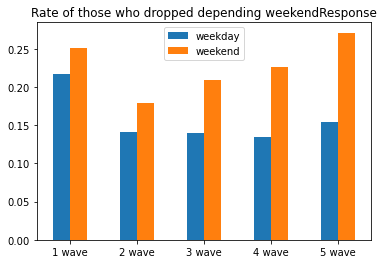

In [8]:
df_rate = prepare_df_bar('weekendResponse', 'political')
df_rate.index = ['weekday', 'weekend']
ax = df_rate.T.plot.bar(
    title='Rate of those who dropped depending weekendResponse', rot=0)

While it seems very clear that the people who answered on the *weekend* are *more likely* to drop out, the number of respondents on the weekend was __much__ lower (typically __less than 10%__).

## Age and gender

### The effect of age on attrition

Age consistently showed up as one, if not the, most important feature across models (logistic regression, DT).

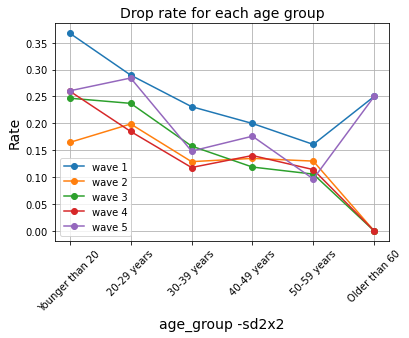

In [9]:
x_labels = ["Younger than 20", "20-29 years",
                               "30-39 years",
                               "40-49 years",
                               "50-59 years",
                               "Older than 60"]
df_all_waves_plot = pd.DataFrame([])
for wave in waves:
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    # merging 60-69 and >70 into one group
    df['age_group -sd2x2'][df['age_group -sd2x2'] == 6] = 5
    data = plot_rate_dropped(
        df, wave, 'Drop rate for each age group', x_labels, 'age_group -sd2x2')
    df_all_waves_plot = pd.concat([df_all_waves_plot, data], axis=1)
plt.show()

Clearly, the older respondents are less likely to drop the survey. However, if we exclude wave 1, there does not seem to be a significant change after the age of 30.

### Attrition depending on `gender` and `age`

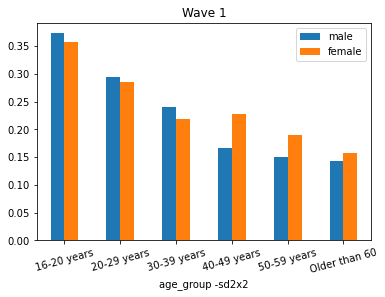

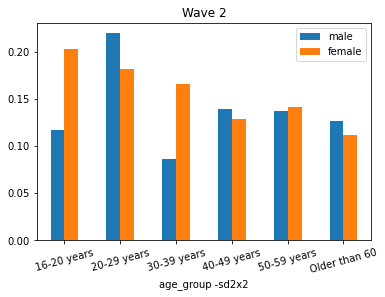

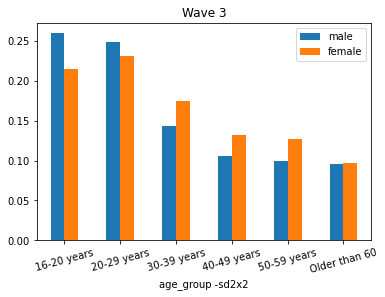

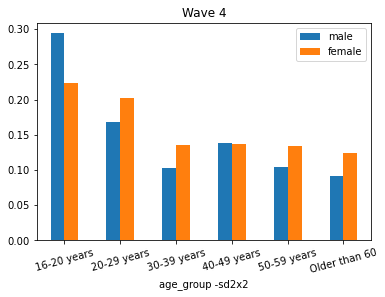

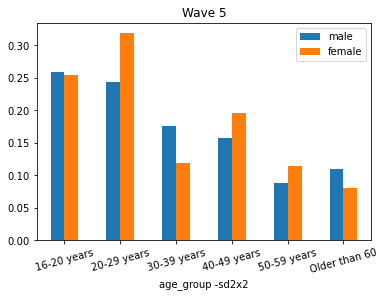

In [10]:
for wave in waves:

    df = pd.read_csv(f'../../data/data_online_personal_w{wave}.csv')
    # here also merging 60-69 and >70 into one group
    df['age_group -sd2x2'].replace({1.0: "16-20 years", 2.0: "20-29 years", 3.0: "30-39 years", 4.0: "40-49 years", 5.0: "50-59 years", 6.0: "Older than 60", 7.0: "Older than 60"}, inplace=True)
    df_male = df.loc[df['GENDER -sd3__1.0'] == 1]
    dropping = df_male.groupby(['age_group -sd2x2', 'panelpat']
                               ).size().unstack(fill_value=0)
    
    rate_dropped_male = pd.DataFrame(dropping[0]/dropping.sum(axis=1))

    df_female = df.loc[df['GENDER -sd3__2.0'] == 1]
    dropping = df_female.groupby(['age_group -sd2x2', 'panelpat']
                                 ).size().unstack(fill_value=0)

    rate_dropped_female = pd.DataFrame(dropping[0]/dropping.sum(axis=1))
    rate_all = pd.concat([rate_dropped_male, rate_dropped_female], axis=1)
    rate_all.columns = ['male', 'female']  # , 'unknown'
    rate_all.plot.bar(title=f'Wave {wave}', rot=15)

We can see the largest differences between genders at the age of 20-59, but no consistent trends among all the waves.

In [11]:
for wave in waves:
    df = pd.read_csv(f'../../data/data_online_personal_w{wave}.csv')
    print(Counter(df['GENDER -sd3__3.0']))

Counter({0: 3997, 1: 22})
Counter({0: 3122, 1: 11})
Counter({0: 2977, 1: 17})
Counter({0: 3151, 1: 15})
Counter({0: 3012, 1: 14})


Drop rate for people who preferred not to say gender is much larger, up to 70-90% (but it is only 13-21 respondents for each wave, so due to scaling reasons we did not plot it with female and male).

## Old but gold

In this section we try to check if people who joined later as refreshment (at waves 4 and 5) drop survey with the same rate as those who were from very beginning

wave: 1
Counter({False: 4019})
wave: 2
Counter({False: 3133})
wave: 3
Counter({False: 2994})
wave: 4
Counter({False: 2850, True: 316})
wave: 5
Counter({False: 2777, True: 249})


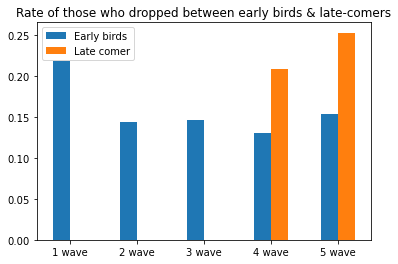

In [12]:
df_rate = prepare_df_bar('refreshment', 'political')
#df_rate = df_rate.drop(['1 wave', '2 wave', '3 wave'], axis=1)
df_rate.index = ['Early birds', 'Late comer']
ax = df_rate.T.plot.bar(
    title='Rate of those who dropped between early birds & late-comers', rot=0)

Those who joined in waves 4 and 5 tend to drop 60-65% more than early birds (people who participated since the beginning)!
We also can observe than drop rate of early birds fluctuates around 15% (except after 1 wave where we lose all unresponsible samples), while drop rate of late comers significatnly increases even more

## Quality/behavioral issues

### Correct left-right assessment

Here we investigate our engineered feature which measures the percentage of correctly assessed parties and politicians on a political left-right spectrum.

wave: 1
Counter({1.0: 1576, 0.8: 1513, 0.6: 570, 0.4: 263, 0.2: 97})
wave: 5
Counter({1.0: 1241, 0.8: 1125, 0.6: 419, 0.4: 186, 0.2: 55})


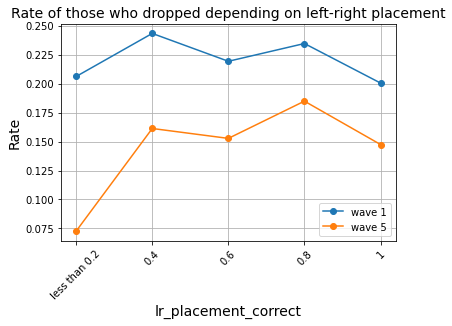

In [13]:
x_labels = ['less than 0.2', '0.4', '0.6', '0.8', '1']
for wave in ['1', '5']:
    df = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    df['lr_placement_correct'].replace(0, 0.2, inplace=True)
    plot_rate_dropped(df, wave,
                      'Rate of those who dropped depending on left-right placement',
                      x_labels,
                      'lr_placement_correct')
    print('wave: ' + wave)
    print(Counter(df['lr_placement_correct']))
plt.show()

LR placement questions were only in waves 1, 4, 5. In wave 4 nearly 95% values are missing (we turned to 0 all features with >50% of values missing). After all cannot be sure about whether it makes sense (in wave 5 the more correct answers - more likely to drop).

### Will they do it again?

If people miss one wave but return at a later point - are they more likely to show up for a later wave as well?

wave: 1
Counter({False: 4019})
wave: 2
Counter({False: 3133})
wave: 3
Counter({False: 2684, True: 310})
wave: 4
Counter({False: 2365, True: 801})
wave: 5
Counter({False: 2151, True: 875})


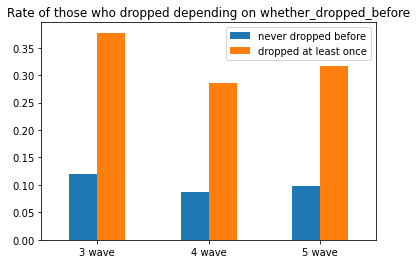

In [14]:
df_rate = prepare_df_bar('whether_dropped_before', 'political')
df_rate = df_rate.drop(['1 wave', '2 wave'], axis=1)
df_rate.index = ['never dropped before', 'dropped at least once']
ax = df_rate.T.plot.bar(
    title='Rate of those who dropped depending on whether_dropped_before', rot=0)

If a person dropped at least once in wave 1 or 2 then probability that they drop again is ~200% higher!

### Is consistency in answers relevant for attrition?

Here we investigate the relevance of another engineered feature. For this we picked some questions which are very similar (or different) and measured if peoples answers are consistent (only higher degrees of sureness are taken into account, e.g. if person strongly agrees that they feel like a stranger due to many muslims but at the same wave strongly agrees that european and muslim lifestyles are easily comparable, then such a sample considered as inconsistent)

Manually, we selected the following questions:
* PREFER INDEPENDENT CITIZEN INSTEAD OF A PARTY MEMBER -w1_q27x8	
* THE PEOPLE SHOULD TAKE MOST IMPORTANT DECISIONS, NOT POLITICIANS -w1_q27x7
* FEELING LIKE A STRANGER DUE TO THE MANY MUSLIMS -w2_q21x4,
* EUROPEAN AND MUSLIM LIFESTYLE ARE EASILY COMPATIBLE -w2_q21x5,
* PEOPLE LIKE ME HAVE RECEIVED LESS THAN THEY DESERVE -w3_q35x1	
* PEOPLE LIKE ME GET LESS ATTENTION THAN OTHERS -w3_q35x2
* SAME ACCESS TO SOCIAL BENEFITS: ASYLUM SEEKERS -w4_q65x2,
* SAME ACCESS TO SOCIAL BENEFITS: NON-AUSTRIANS -w4_q65x1,
* IMMIGRANTS GET MORE ATTENTION -w5_q30x2	
* IMMIGRANTS HAVE RECEIVED MORE THAN THEY DESERVE -w5_q30x1

wave: 1
Counter({1: 3273, 0: 746})
wave: 2
Counter({0: 2808, 1: 325})
wave: 3
Counter({1: 2090, 0: 904})
wave: 4
Counter({0: 1778, 1: 1388})
wave: 5
Counter({1: 1660, 0: 1366})


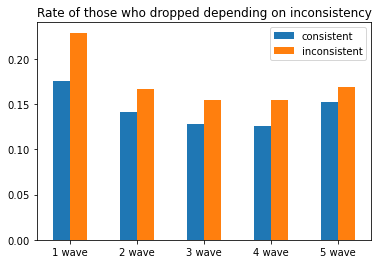

In [15]:
df_rate = prepare_df_bar('inconsistency', 'political')

df_rate.index = ['consistent', 'inconsistent']
ax = df_rate.T.plot.bar(
    title='Rate of those who dropped depending on inconsistency', rot=0)

No significant differences, but "inconsistent" respondents tend to drop a bit more: 2-4 percentage points

### Plato, Sokrates and a *know-it-all*  walk into a cave...

Lets look at the top quartil of respondents in terms of the number of `don't know` they chose.

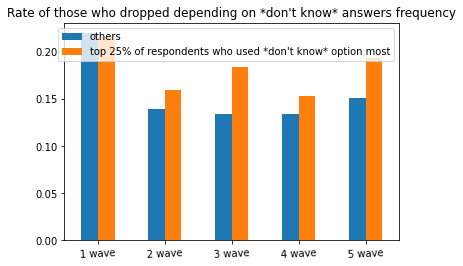

In [16]:
df_rate = pd.DataFrame([])
for wave in waves:
    df = pd.read_csv(f'../../data/data_online_political_w{wave}.csv')
    dont_know_df = df.filter(like='dont_know_ratio', axis=1)
    dont_know_df = pd.concat([dont_know_df, df['panelpat']], axis=1)
    quantile_75 = dont_know_df['dont_know_ratio'].quantile(0.75)
    dont_know_df.loc[dont_know_df['dont_know_ratio'] > quantile_75, 'dont_know_ratio'] = 1
    dont_know_df.loc[dont_know_df['dont_know_ratio'] <= quantile_75, 'dont_know_ratio'] = 0
    dropping = dont_know_df.groupby(['dont_know_ratio', 'panelpat']).size().unstack(fill_value=0)
    rate_dropped = pd.DataFrame(dropping[0]/dropping.sum(axis=1))
    rate_dropped.columns = [f'{wave} wave']
    df_rate = pd.concat([df_rate, rate_dropped], axis=1)
df_rate.index = ['others', "top 25% of respondents who used *don't know* option most"]
ax = df_rate.T.plot.bar(title="Rate of those who dropped depending on *don't know* answers frequency", rot=3)

Drop rate slightly increases but only up to 5 percentage points (binary feature: top 25% with largest number of "don't know" responses are 1, tend to drop more often)

It might make sense to look at the distribution first. Maybe there is a linear trend? Maybe only the top 5% are different?

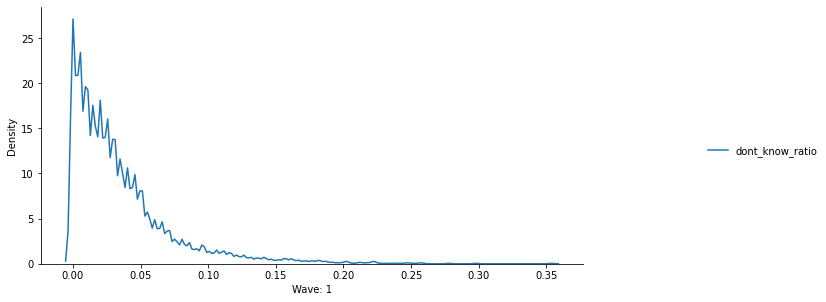

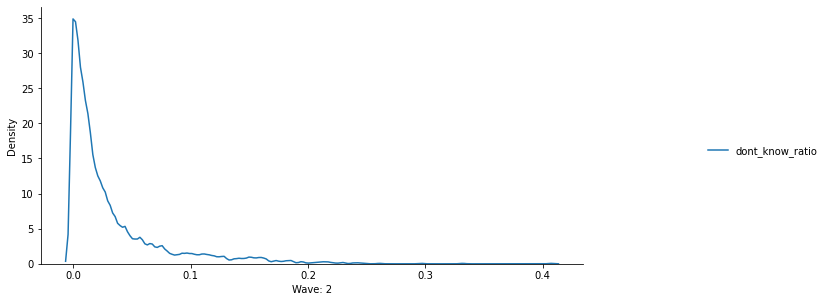

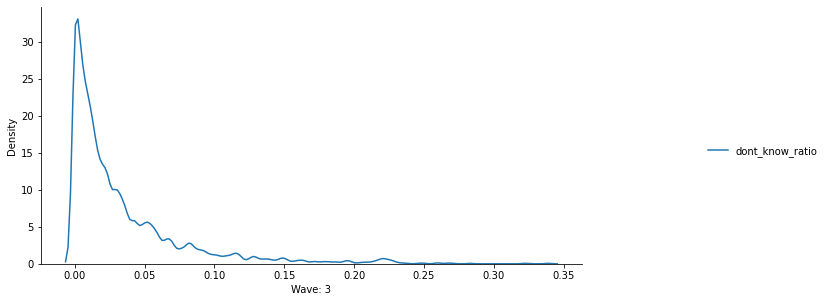

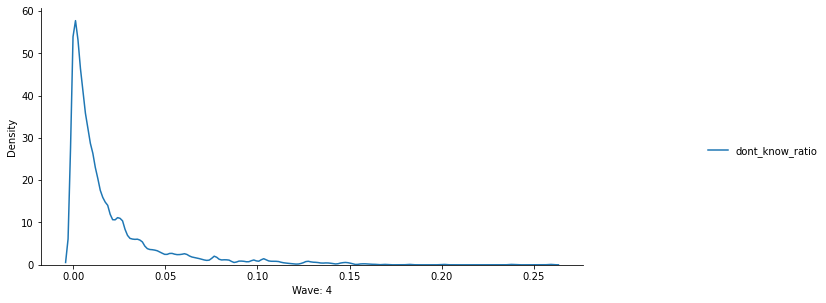

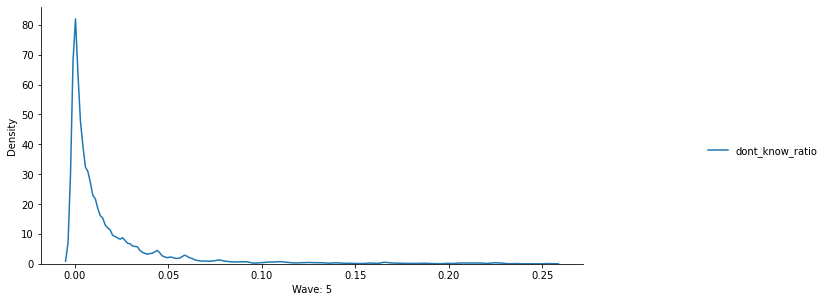

In [17]:
for wave in waves:
    df = pd.read_csv(f'../../data/data_online_political_w{wave}.csv')
    dtes = df.filter(like='dont_know_ratio', axis=1)
    h = sns.displot(dtes, kind="kde", bw_adjust=.25)
    h.fig.set_size_inches(12, 4)
    h.set_axis_labels(f'Wave: {wave}')

Most of the respondents choose "don't know" option ("don't know", 77, 88 (for numeric questions)) in less than 5% cases among all the waves. Hence is makes sense to check if there is linear trend for different rates of "don't know" number.

Counter({0.07: 2148, 0.02: 1597, 0.15: 246, 0.3: 28})
Counter({0.02: 1797, 0.07: 1068, 0.15: 240, 0.3: 28})
Counter({0.02: 1640, 0.07: 1127, 0.15: 181, 0.3: 46})
Counter({0.02: 2223, 0.07: 838, 0.15: 102, 0.3: 3})
Counter({0.02: 2269, 0.07: 651, 0.15: 83, 0.3: 23})


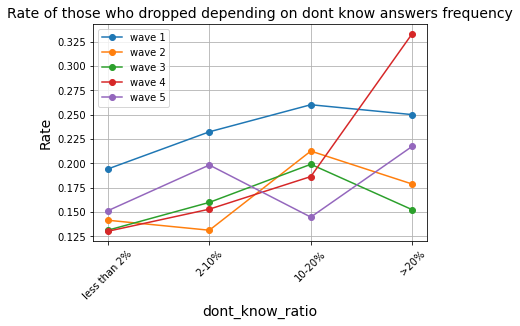

In [18]:
x_labels = ['less than 2%', '2-10%', '10-20%', '>20%']
for wave in waves:
    df = pd.read_csv(f'../../data/data_online_political_w{wave}.csv')
    df['dont_know_ratio'][df['dont_know_ratio'] <= 0.02] = 0.02
    df.loc[(df['dont_know_ratio'] <= 0.1) & (
        df['dont_know_ratio'] > 0.02), 'dont_know_ratio'] = 0.07
    df.loc[(df['dont_know_ratio'] <= 0.2) & (
        df['dont_know_ratio'] > 0.1), 'dont_know_ratio'] = 0.15
    df['dont_know_ratio'][df['dont_know_ratio'] > 0.2] = 0.3
    print(Counter(df['dont_know_ratio']))
    plot_rate_dropped(df, wave, 'Rate of those who dropped depending on dont know answers frequency',
                      x_labels, 'dont_know_ratio')

We can see that probability to drop increases for 5-15 p.p. if one chooses "don't know" in more than 35% cases, but the trend is quite flat.

### Correct left-right assessment of politicians only

wave: 1
Counter({0.0: 1234, 1.0: 858, 0.25: 776, 0.5: 667, 0.75: 484})
wave: 4
Counter({0.0: 2963, 0.25: 78, 0.5: 58, 1.0: 38, 0.75: 29})


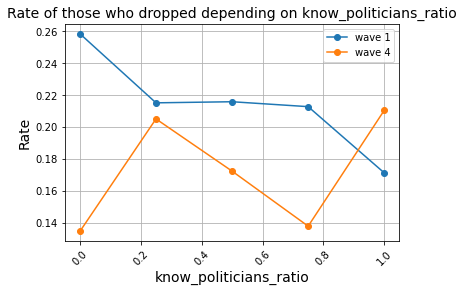

In [19]:
for wave in ['1', '4']:
    df = pd.read_csv(f'../../data/data_online_political_w{wave}.csv')
    plot_rate_dropped_normalized(
        df, wave, 'Rate of those who dropped depending on know_politicians_ratio', 'know_politicians_ratio')
    print(f'wave: {wave}')
    print(Counter(df['know_politicians_ratio']))
plt.show()

Question was asked only in wave 1, 4, 6

Features coded identically, but results are opposite! (these questions were asked to only 10% of respondents in wave 4 while in wave 1 everyone was asked, NaN coded as 0)

### *Straightlining* 

We try to capture **straightlining** (at least in the context of opinion questions. We do so by measuring how often the same degree of agreement was chosen.

wave: 1
Counter({0.5: 2612, 0.3: 1015, 0.7: 334, 1.0: 58})
wave: 2
Counter({0.5: 2491, 0.7: 358, 0.3: 251, 1.0: 33})
wave: 3
Counter({0.5: 2216, 0.3: 433, 0.7: 296, 1.0: 49})
wave: 4
Counter({0.5: 1909, 0.3: 1055, 0.7: 168, 1.0: 34})
wave: 5
Counter({0.5: 2184, 0.7: 425, 0.3: 324, 1.0: 93})


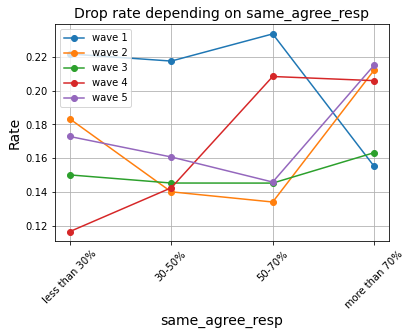

In [21]:
x_labels = ['less than 30%', '30-50%', '50-70%', 'more than 70%']
for wave in waves:
    df = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    df['same_agree_resp'][df['same_agree_resp'] <= 0.3] = 0.3
    df.loc[(df['same_agree_resp'] <= 0.5) & (
        df['same_agree_resp'] > 0.3), 'same_agree_resp'] = 0.5
    df.loc[(df['same_agree_resp'] <= 0.7) & (
        df['same_agree_resp'] > 0.5), 'same_agree_resp'] = 0.7
    df['same_agree_resp'][df['same_agree_resp'] > 0.7] = 1
    plot_rate_dropped(df,
                      wave,
                      'Drop rate depending on same_agree_resp',
                      x_labels,
                      'same_agree_resp')

    print('wave: ' + wave)
    print(Counter(df['same_agree_resp']))
plt.show()

People who picked the same degree of agreement on more than 70% of questions are more likely to drop out in the next wave.

## Distribution of interview duration

In [22]:
df = pd.read_csv('../../data/10017_da_en_v2_0.tab', sep='\t')
dtes = df.filter(like='intdur', axis=1)
# Convert seconds to minutes
dtes = dtes/60
stacked_intdur = pd.DataFrame(dtes.stack(), columns=['intdur'])

In [23]:
stacked_intdur['wave_intdur'] = stacked_intdur.index.get_level_values(1)
# I wanted to colour waves depending on median, but could not make it (yet!)
median_series = stacked_intdur.groupby('wave_intdur')['intdur'].median()
stacked_intdur['median_intdur'] = stacked_intdur['wave_intdur'].map(
    median_series)
# Filtering only those who made it less than in 120 mins
# Otherwise plots are superskewed and not informative
stacked_intdur = stacked_intdur.query("intdur<120")

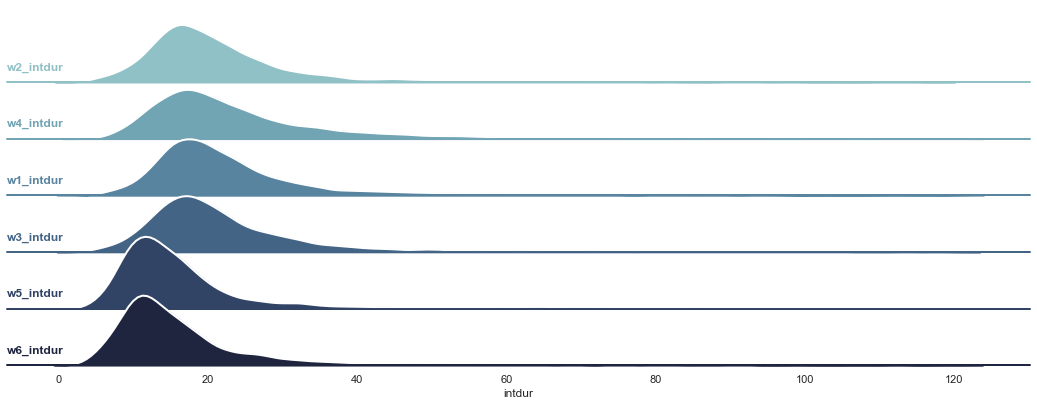

In [24]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(6, rot=-.25, light=.7)
g = sns.FacetGrid(stacked_intdur, row="wave_intdur",
                  hue="wave_intdur", aspect=15, height=1, palette=pal)

# Draw the densities
g.map(sns.kdeplot, "intdur",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "intdur", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "intdur")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

Probably it makes sense to drop respondents who makes it in less than 5 mins (waves 5 and 6 are super quick, maybe less questions are there)

In [25]:
frame = {'total': dtes.count(), '>60 mins': dtes[dtes > 60].count(
), '<5 mins': dtes[dtes < 5].count()}
result = pd.DataFrame(frame)
result

,total,>60 mins,<5 mins
w1_intdur,4020,373,1
w2_intdur,3140,362,7
w3_intdur,2998,353,4
w4_intdur,3166,434,0
w5_intdur,3038,279,12
w6_intdur,3004,401,30


Hence we can consider too fast people as outliers in terms of interview duration

## Distribution of answers for opinion responses
(e.g. immigration to Austria only in exceptional cases)

straightliners (chosen exactly the same answer in >= 60% of cases) are excluded

Initial number of respondents:  4453
Number of respondents after dropping straightliners:  4359


<BarContainer object of 5 artists>

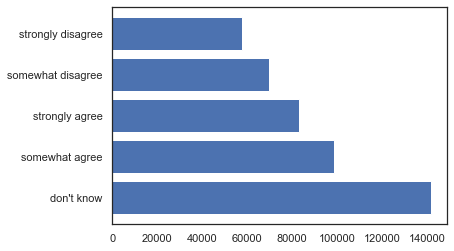

In [26]:
df = pd.read_csv('../../data/10017_da_en_v2_0.tab', sep='\t')
X_mode_agreement = df[opinion_questions]

print('Initial number of respondents: ', X_mode_agreement.shape[0])
same_agree_resp_rate = pd.DataFrame(X_mode_agreement.stack().groupby(
    level=0).value_counts().max(level=0) / X_mode_agreement.shape[1])
same_agree_resp_rate.columns = ['same_agree_resp']
X_mode_agreement = pd.concat([X_mode_agreement, same_agree_resp_rate], axis=1)
X_mode_agreement = X_mode_agreement[X_mode_agreement.same_agree_resp <= 0.5]
X_mode_agreement = X_mode_agreement.drop(['same_agree_resp'], axis=1)
X_mode_agreement_cols = X_mode_agreement.columns
print('Number of respondents after dropping straightliners: ',
      X_mode_agreement.shape[0])
X_mode_agreement.mask(X_mode_agreement == 88.0, 3, inplace=True)
X_mode_agreement.mask(X_mode_agreement == 99.0, 3, inplace=True)
X_mode_agreement.replace({1.0: "strongly agree", 2.0: "somewhat agree", 3.0: "don't know", 4.0: "somewhat disagree", 5.0: "strongly disagree"}, inplace=True)
plt.barh(X_mode_agreement.stack().value_counts().index, height=0.8,
         width=X_mode_agreement.stack().value_counts(), align='center')

"partly argee/disagree seems" to be versatile answer => most frequent one ("strongly agree/disagree" and "completely agree/disagree" are merged here)

## The strongest correlations

In [29]:
opinion_corr = df[opinion_questions]
opinion_corr = opinion_corr.rename(columns=get_ordinal_names())
names = list(get_ordinal_names().values())
opinion_corr = opinion_corr[opinion_corr.columns.intersection(names)]

opinion_corr = opinion_corr.corr().unstack().reset_index()
opinion_corr[opinion_corr[0] == 1] = 0
opinion_corr[abs(opinion_corr[0]) < 0.6] = np.nan
opinion_corr = opinion_corr.dropna()
opinion_corr = opinion_corr.sort_values([0])
opinion_corr = pd.DataFrame(
    pd.concat([opinion_corr[-10:], opinion_corr[:10]], axis=0))
opinion_corr.columns = ['feature 1', 'feature 2', 'correlation']
opinion_corr = opinion_corr.drop_duplicates(subset=['correlation'])
cm = sns.light_palette("red", as_cmap=True)
opinion_corr

,feature 1,feature 2,correlation
15807,SAME ACCESS TO SOCIAL BENEFITS: ASYLUM SEEKERS -w4_q65x2,SAME ACCESS TO SOCIAL BENEFITS: NON-AUSTRIANS -w4_q65x1,0.905588
21889,MUSLIMS HAVE FEWER CHANCES IN AUSTRIA -w6f_q27x1,MUSLIMS ARE RARELY DISCRIMINATED AGAINST IN AUSTRIA -w6f_q27x2,0.913376
16109,SAME ACCESS TO SOCIAL BENEFITS: WESTERN EUROPEANS (OLD EU MEMBER STATES) -w4_q65x4,SAME ACCESS TO SOCIAL BENEFITS: NON-AUSTRIANS -w4_q65x1,0.919586
15658,SAME ACCESS TO SOCIAL BENEFITS: NON-AUSTRIANS -w4_q65x1,SAME ACCESS TO SOCIAL BENEFITS: EASTERN EUROPEANS (NEW EU MEMBER STATES) -w4_q65x3,0.927595
16111,SAME ACCESS TO SOCIAL BENEFITS: WESTERN EUROPEANS (OLD EU MEMBER STATES) -w4_q65x4,SAME ACCESS TO SOCIAL BENEFITS: EASTERN EUROPEANS (NEW EU MEMBER STATES) -w4_q65x3,0.937973
20077,"MORE AND MORE PEOPLE IN EUROPE, WHO ARE A THREAT TO SOCIETY -w6q23x3",MUSLIMS ARE RARELY DISCRIMINATED AGAINST IN AUSTRIA -w6f_q27x2,0.600006
19457,CRIME RATES INCREASE IN AUSTRIA BECAUSE OF IMMIGRANTS -w5_q43x5,IMMIGRANTS PAY MORE INTO THE SOCIAL SECURITY SYSTEM -w5_q43x6,0.600808
22783,LIKE TO BE RESPONSIBLE IN SITUATIONS THAT DEMAND A LOT OF THINKING -w6_q30x2,ABORTION SHOULD BE ALLOWED IN ANY CASE -w6_q26x1,0.600897
3049,POLITICS MUST FIGHT SOCIAL INEQUALITY -w1_q44x1,TODAYS YOUTH WILL HAVE A BETTER LIFE THAN THEIR PARENTS -w1_q44x10,0.601764
9874,PREFER INDEPENDENT CITIZEN INSTEAD OF A PARTY MEMBER -w3_q19x7,COMPROMISES IN POLITICS MEANS BETRAYING ONES PRINCIPLES -w3_q19x1,0.602257


These questions were candidates for inconsistency depending on correlation and logical relation between possible responses.

No clusters among the most correlated features (only with opinion questions related to immigrants and asylum seekers). In the next step of clustering these questions were the most important to split respondents into groups

In [ ]:
# convert this notebook to pdf but without the code
# next line doesn't work on my machine :(
#! jupyter nbconvert - -to pdf - -TemplateExporter.exclude_input = True - -output-dir = output_pdf data_exploration.ipynb
# !jupyter-nbconvert --to pdfviahtml --TemplateExporter.exclude_input=True --output-dir=output_pdf data_exploration.ipynb